<a href="https://colab.research.google.com/github/MaryAdewunmi/Explainable-AI-Models/blob/main/XAI_with_BreastCancer_diagnosis_Model_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [ ]:
!pip install shap
import pandas as pd
import numpy as np
import shap
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')



# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

     |████████████████████████████████| 564 kB 8.7 MB/s 


## Load the data
Display the first 5 rows of the data after loading.

In [ ]:

url="https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv"
ai=pd.read_csv(url)
ai.head()

id  radius_mean  ...  fractal_dimension_worst  diagnosis
0    914102        13.16  ...                  0.07429          B
1     91858        11.75  ...                  0.07757          B
2  88466802        10.65  ...                  0.08147          B
3   9111843        12.00  ...                  0.08194          B
4  84862001        16.13  ...                  0.11420          M

[5 rows x 32 columns]

## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
print('The shape of our features is:', ai.shape)


The shape of our features is: (398, 32)


In [ ]:
ai.describe

<bound method NDFrame.describe of            id  radius_mean  ...  fractal_dimension_worst  diagnosis
0      914102       13.160  ...                  0.07429          B
1       91858       11.750  ...                  0.07757          B
2    88466802       10.650  ...                  0.08147          B
3     9111843       12.000  ...                  0.08194          B
4    84862001       16.130  ...                  0.11420          M
..        ...          ...  ...                      ...        ...
393  86730502       16.160  ...                  0.07619          M
394   8712289       23.270  ...                  0.09187          M
395    845636       16.020  ...                  0.08452          M
396    903483        8.734  ...                  0.08865          B
397    851509       21.160  ...                  0.07526          M

[398 rows x 32 columns]>

In [ ]:
ai.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [ ]:
print(ai.info())
print(ai.describe(include='all', datetime_is_numeric=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [ ]:
rows, columns = ai.shape
cell_count = rows * columns
number_of_nulls = ai.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 0.0%


In [ ]:
# Check to see if any rows have less than 2 elements.
under_threshold_removed = ai.dropna(axis='index', thresh=2, inplace=False)
under_threshold_rows = ai[~ai.index.isin(under_threshold_removed.index)]
print(under_threshold_rows)

Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, diagnosis]
Index: []


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
ai['diagnosis'].dtypes

dtype('O')

In [ ]:
ai['diagnosis'] = pd.Categorical(ai.diagnosis)
ai.dtypes


id                            int64
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [ ]:
cat_cols = ai.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index(['diagnosis'], dtype='object')

In [ ]:
ai[cat_cols] = ai[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
ai.head()

id  radius_mean  ...  fractal_dimension_worst  diagnosis
0    914102        13.16  ...                  0.07429          0
1     91858        11.75  ...                  0.07757          0
2  88466802        10.65  ...                  0.08147          0
3   9111843        12.00  ...                  0.08194          0
4  84862001        16.13  ...                  0.11420          1

[5 rows x 32 columns]

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(ai['diagnosis'])
# Remove the labels from the features
# axis 1 refers to the columns
features= ai.drop('diagnosis', axis = 1)
# Saving feature names for later use
feature_list = list(ai.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
ai.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [ ]:
Y = ai['diagnosis']
X =  ai[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (318, 10)
Training Labels Shape: (318,)
Testing Features Shape: (80, 10)
Testing Labels Shape: (80,)


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [ ]:

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=20)
model.fit(X_train, Y_train)



RandomForestRegressor(max_depth=6, n_estimators=20, random_state=0)

In [ ]:
predictions = model.predict(X_test)
predictions[:10]

array([8.77192982e-04, 1.00000000e+00, 6.50000000e-01, 5.59375000e-01,
       6.00000000e-01, 9.50000000e-01, 7.50000000e-01, 4.68750000e-02,
       1.00000000e+00, 1.00000000e+00])

## Evaluate the model using Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y_test.dtypes

dtype('int8')

In [ ]:
X_test.dtypes

radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [ ]:
accuracy_score( Y_test, predictions)

ValueError: ignored

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
# creating an explainer for our model
explainer = shap.TreeExplainer(model)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: [0.36666667]


0         1         2  ...         7         8         9
0 -0.030754 -0.090612  0.003360  ... -0.166043  0.000909  0.000950
1  0.090288  0.014408  0.008874  ...  0.396192 -0.008122 -0.000347
2 -0.081182  0.064433 -0.057139  ...  0.473954  0.029443  0.005127
3 -0.020408  0.016381  0.008501  ...  0.194779  0.004740 -0.002055
4 -0.019839  0.022873 -0.019364  ...  0.294596 -0.031503 -0.003467

[5 rows x 10 columns]

## Write your inferences from the generated plot.
This shows that the Expected Value: 0.366666 being displayed above will be used as the base value throughout all the visualizations below. The values above this base value will be put into class 1 (Malignant) whereas the values below it will be put into class 0 (Benign).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
Y_test[0]


0

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Write your inferences from the generated plot.

Features pushing the prediction higher are shown in red which is perimeter_worst and it is very low, thus making the result to be benign.

We can see all the features are displayed in blue i.e all features contributed in making the diagnosis benign

The final value(displayed in bold),-0.05 is much lower than the base value. Thus, the patient is classified as Benign cancer.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
ai.shape

(398, 32)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[:80,:], X_test.iloc[:80,:])

## Write your inferences from the generated plot.

The above visualization can be interacted with in multiple ways. Try out the drop down boxes on both sides.

The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can hover over the graph to understand the following observations:


This graph shows the graph of 80 test samples and this indicates the following:

. Most dominant features pushing the model towards making a prediction for Malignant diagnosis is Concave point mean.




# Task 6

## Plot a SHAP summary plot using all the features in the data

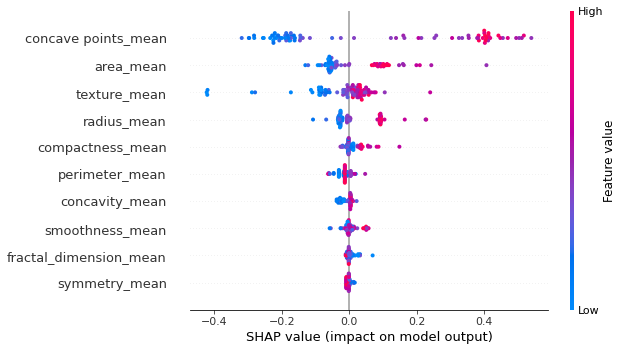

In [ ]:
shap.summary_plot(shap_values,X_test)

## Write your inferences from the generated plot.

The plot shows that perimeter worst,radius worst,concave points worst, concave point mean are the positively correlated with all the diagnoses making it to be Malignant while others are correlated with few diagnoses. In all, the highest indicator is concave points_mean

# Task 7

##Plot a SHAP dependecne plot using all features in the data

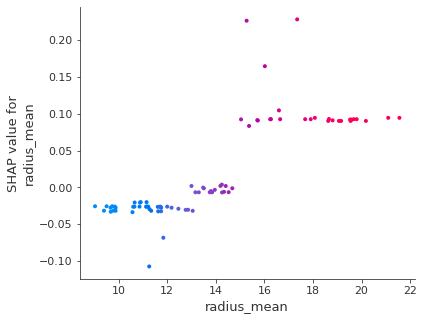

In [ ]:
shap.initjs()
shap.dependence_plot(ind='radius_mean', interaction_index='radius_mean',
                     shap_values=shap_values, 
                     features=X_test)

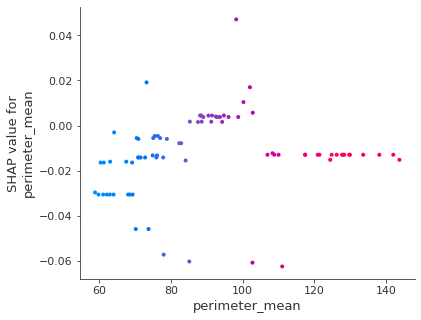

In [ ]:
shap.initjs()
shap.dependence_plot(ind='perimeter_mean', interaction_index='perimeter_mean',
                     shap_values=shap_values, 
                     features=X_test)

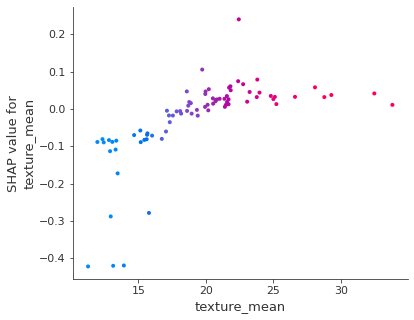

In [ ]:
shap.initjs()
shap.dependence_plot(ind='texture_mean', interaction_index='texture_mean',
                     shap_values=shap_values, 
                     features=X_test)

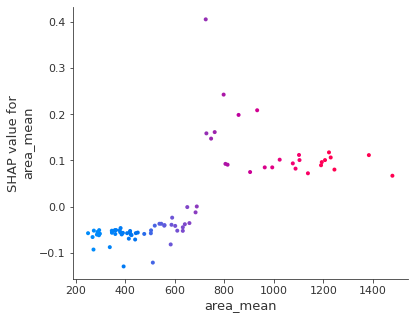

In [ ]:
shap.initjs()
shap.dependence_plot(ind='area_mean', interaction_index='area_mean',
                     shap_values=shap_values, 
                     features=X_test)

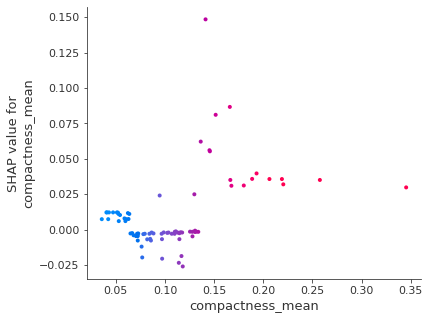

In [ ]:
shap.initjs()
shap.dependence_plot(ind='compactness_mean', interaction_index='compactness_mean',
                     shap_values=shap_values, 
                     features=X_test)

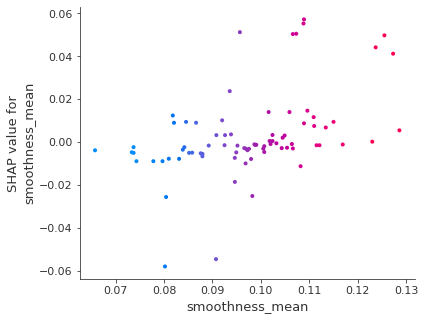

In [ ]:
shap.initjs()
shap.dependence_plot(ind='smoothness_mean', interaction_index='smoothness_mean',
                     shap_values=shap_values, 
                     features=X_test)

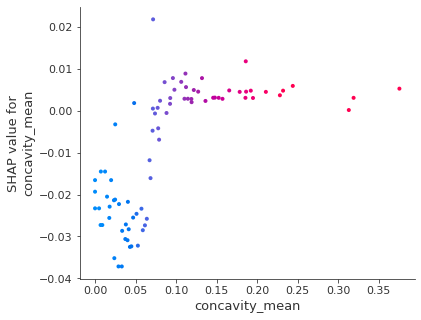

In [ ]:
shap.initjs()
shap.dependence_plot(ind='concavity_mean', interaction_index='concavity_mean',
                     shap_values=shap_values, 
                     features=X_test)

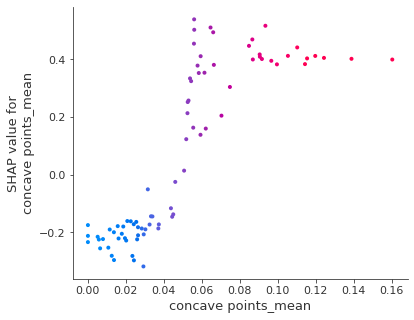

In [ ]:
shap.initjs()
shap.dependence_plot(ind='concave points_mean', interaction_index='concave points_mean',
                     shap_values=shap_values, 
                     features=X_test)

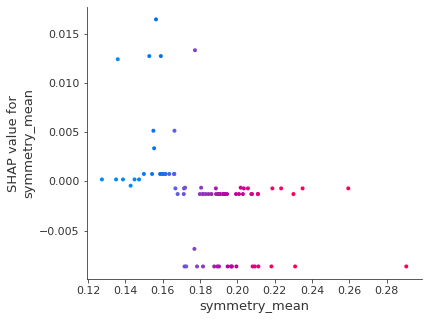

In [ ]:
shap.initjs()
shap.dependence_plot(ind='symmetry_mean', interaction_index='symmetry_mean',
                     shap_values=shap_values, 
                     features=X_test)

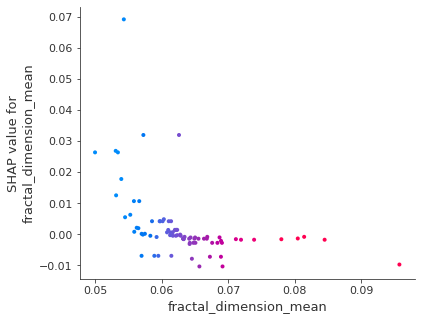

In [ ]:
shap.initjs()
shap.dependence_plot(ind='fractal_dimension_mean', interaction_index='fractal_dimension_mean',
                     shap_values=shap_values, 
                     features=X_test)

## Write your inferences from the generated plot.

# Task 8 (Optional)

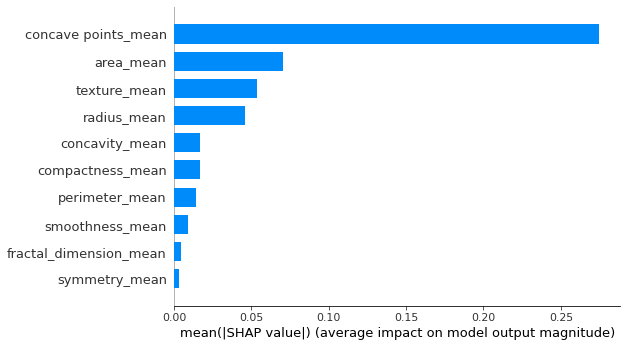

In [ ]:
#A simpler version of shap summary plot
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

This also validate the previous inference that concave point mean has a very significant impact on breast cancer diagnosis to be either Malignant or Benign While symmetry mean has very minute impact on the diagnosis.

## Do anything and everything with SHAP
This notebook is done by Mary!